# Module 2 Assignment 1: House Prices: Advanced Regression Techniques EDA (Kaggle)

**Reed Ballesteros**

**MSDS-422**

**4/17/2022**

**Instructor: Prof. Noah Gift**

## Background
Compete in the House Prices:  Advanced Regression Techniques (https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition, where you will predict house prices in Ames, Iowa (‘SalePrice’).  You will be required to submit predictions to Kaggle.com and provide evidence of those submissions. As part of the analysis, you must address the following at a minimum. 

## Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  

## Requirements
- Conduct your analysis using a cross-validation design.
- Conduct / improve upon previous EDA.
- Build models with many variables.
- Transform and feature engineer as appropriate.
- Build at a minimum the following regression models.
- - Lasso
- - Ridge
- - ElasticNet
- Conduct hyperparameter tuning for the ElasticNet.
- Evaluate performance of the model using the Kaggle metric upon which your scores are evaluated.
- Submit at least two models to Kaggle.com for evaluation. Provider your Kaggle.com user name and screen snapshots of your Kaggle scores.

### Libraries to be loaded:

In [1028]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm


## INGEST

In [1029]:
train_df = pd.read_csv("train.csv")
train_df_y = train_df['SalePrice']
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1030]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1031]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## EDA

- **Conduct / improve upon previous EDA.**

**(Note: most of EDA has been imported from last week's Module 2 Assignment 1 work.)**

**The dependent variable is SalePrice, as the column exists in the training data but not in the test data.**

**There are 1460 entires in the training data and 1459 entires in the test data.**

In [91]:
train_df.shape

(1460, 81)

In [92]:
test_df.shape

(1459, 80)

**Let's takea quick look at the training data.**

In [659]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [660]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [661]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**Identifying the dependent variable:**

**Comparing the columns bewteen the training and test data, the difference between them is the missing column 'SalePrice' in the test data, which will be our dependent variable, as well as out prediction objective overall.**

**Distribution of SalePrice:**

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

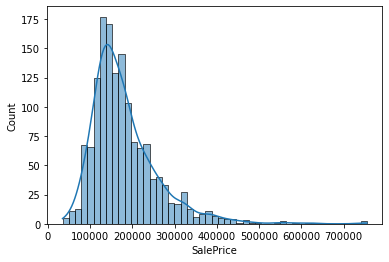

In [662]:
sns.histplot(data=train_df, kde=True, x='SalePrice')


In [663]:
train_df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

**The median SalePrice is \\$163000 while the mean is \\$180921.20.**

**Performing a logarithmic transformation of Sale Price looks to have a more normal distribution.**

In [186]:
salePriceLog = np.log(train_df['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

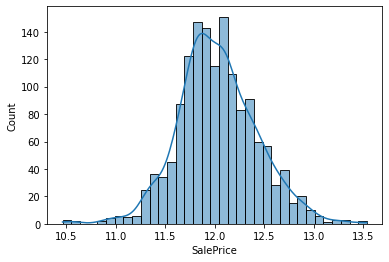

In [705]:
sns.histplot(kde=True, x=salePriceLog)

In [706]:
salePriceLog.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

**Joint Plots of SalePrice in respect to other features like OverallCond and GrLivingArea:**

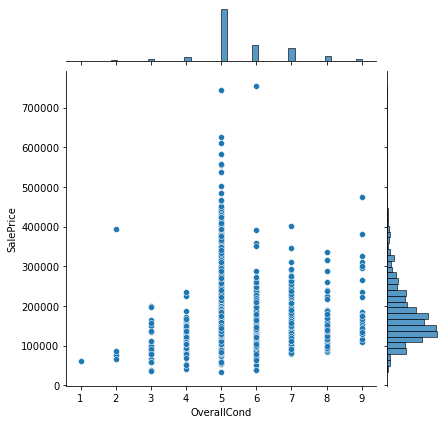

In [664]:
sns.jointplot(x="OverallCond", 
              y="SalePrice",
             edgecolor="white",
             data=train_df);

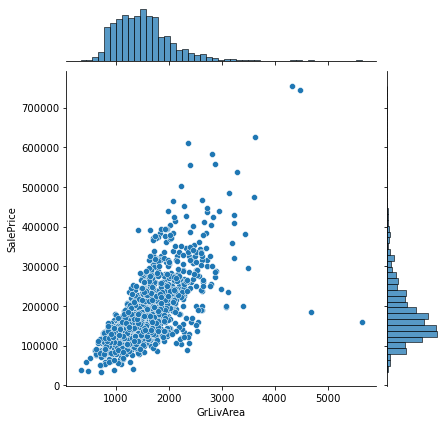

In [665]:
sns.jointplot(x="GrLivArea", 
              y="SalePrice",
             edgecolor="white",
             data=train_df);

**Qualitative/categorial data:**

In [1032]:
 # get a list of qualitative columns in the training set, where colume type = 'object'
qual_cols = [f for f in train_df.columns if train_df.dtypes[f] == 'object']
qual_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

**Quantitative/numerical data:**

In [1033]:
 # get a list of quantitative columns in the training set, where colume type = 'object'
quant_cols = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
quant_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

**We can remove 'Id' from the list of quantitative columns since it is a row identifer than a quantitative value.**

In [ ]:
quant_cols.remove('Id')

**Let's look at empty/null values in the training dataset.**

In [669]:
num_na_features = train_df.isna().sum()
num_na_features = num_na_features[num_na_features > 0]
num_na_features.sort_values(inplace=True)
num_na_features.describe()

count      19.000000
mean      366.578947
std       546.815764
min         1.000000
25%        37.000000
50%        81.000000
75%       474.500000
max      1453.000000
dtype: float64

In [670]:
num_na_features.size

19

**Let's graph a bar chart of null values.**

<AxesSubplot:>

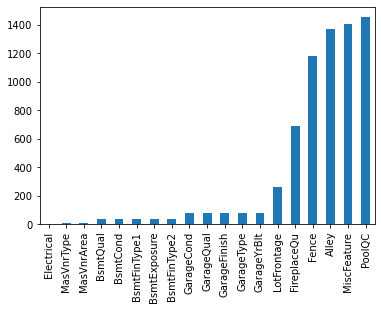

In [671]:
num_na_features.plot.bar()

**There are 19 features that contain null values.**

**Most listings/rows do not contain 'FireplaceQC','PoolQC', 'Alley', 'Fence', 'MiscFeature', features. We'll concentrate on these particular features.**

**Almost half of the homes do not list 'FireplaceQC' (690) because they do not have a fireplace.**

In [672]:
train_df[train_df['Fireplaces'] == 0].FireplaceQu.isnull().sum()


690

In [673]:
train_df[train_df['Fireplaces'] != 0].FireplaceQu.isnull().sum()

0

**All but 7 of the 1460 listings/rows do not have 'PoolQc' since 'PoolArea' = 0 (most likely indicates there is no pool in these homes).**

In [674]:
len(train_df[train_df['PoolArea'] == 0])

1453

**Though data_description.txt lists 'Alley' value 'NA' to indicate 'no alley access' for a listing/home, the data most likely just uses a null value instead.**

In [675]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [676]:
train_df['Alley'].isnull().sum()

1369

**We might assume 'Fence' might be done in the same fashion.**

In [677]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [678]:
train_df['Fence'].isnull().sum()

1179

**We might also assume 'MiscFeature' is done the same way as well.**

In [679]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [680]:
train_df['MiscFeature'].isnull().sum()

1406

**Homes that have null basement features is due to that they do not have basements (TotalBsmtSF = 0).**

In [681]:
len(train_df[train_df['TotalBsmtSF'] == 0] )


37

**Homes that have null garage features is due to that they do not have garages (GarageArea = 0).**

In [682]:
len(train_df[train_df['GarageArea'] == 0])


81

In [683]:
null_mason = train_df[train_df['MasVnrType'].isna()]
null_mason['MasVnrArea']


234    NaN
529    NaN
650    NaN
936    NaN
973    NaN
977    NaN
1243   NaN
1278   NaN
Name: MasVnrArea, dtype: float64

**Let's look at outliers bewteen Living Area (GrLivingArea) and the dependent variable (SalePrice).**

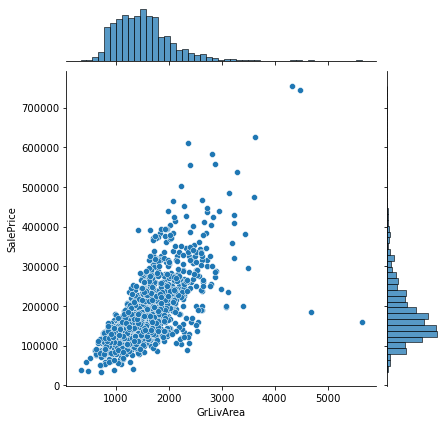

In [684]:
sns.jointplot(x="GrLivArea", 
              y="SalePrice",
             edgecolor="white",
             data=train_df);

**GrLivingArea seems to correlate well with SalePrice, including most outliers, with the exception of two larger homes with a Sale Price seem to be just over the median or average.**

**Let's create a histogram of each qualitative feature to observe their respective distribution.**

In [394]:
train_quant_df_temp = train_df[quant_cols].copy()
y_temp = train_quant_df_temp['SalePrice']

numCols = 2
numRows = int((len(quant_cols)/numCols))
if (len(quant_cols)%numCols > 0):
    numRows += 1
rowCount = 0
colCount = 0

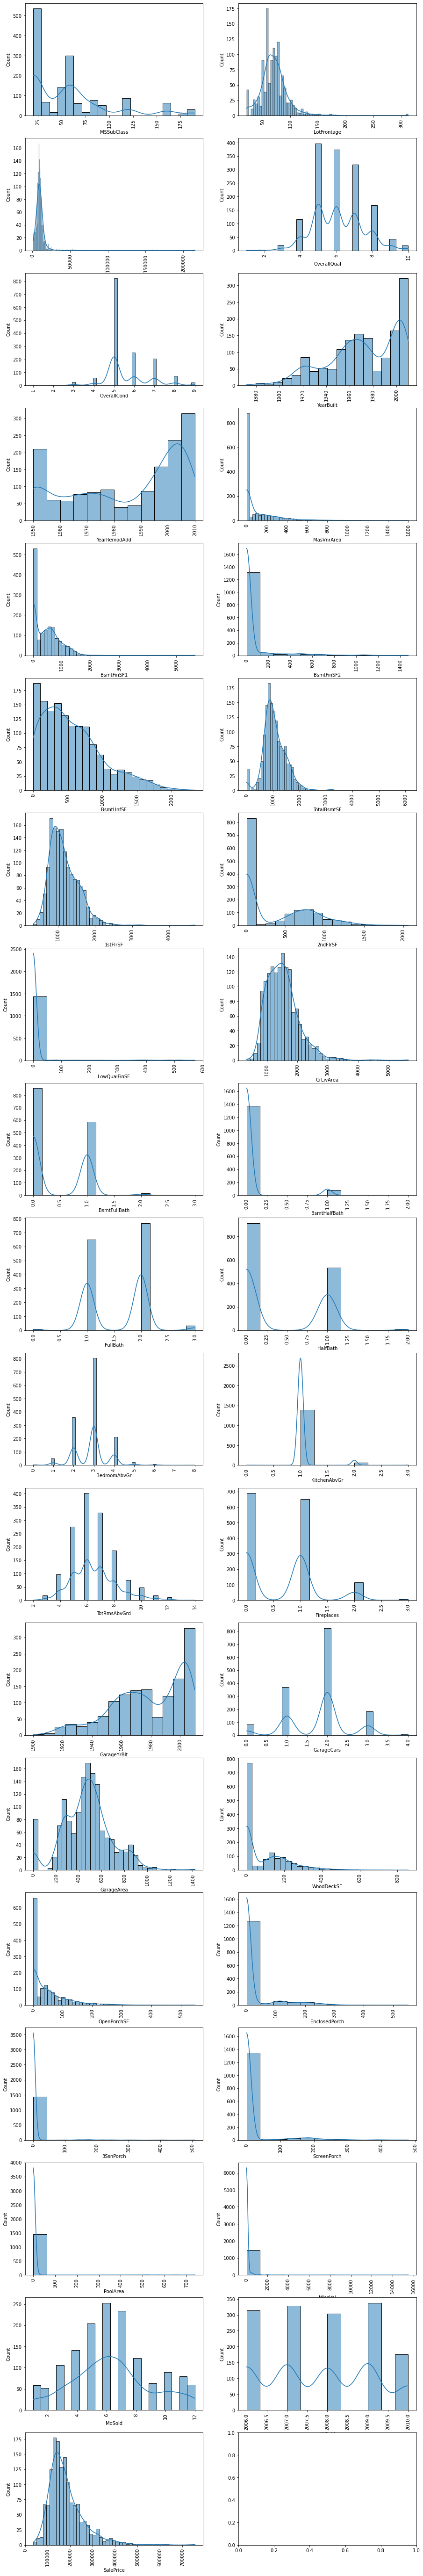

In [395]:
fig, axes = plt.subplots(numRows, numCols, figsize=(15, 100))

rowCount = 0
colCount = 0

## for c in quant_cols:
for c in quant_cols:
    axes[rowCount, colCount].tick_params(axis='x', rotation=90)
    sns.histplot(ax=axes[rowCount, colCount], data=train_quant_df_temp, kde=True, x=c)
    colCount += 1
    if (colCount == numCols):
        colCount = 0
        rowCount += 1
        if (rowCount == numRows):
            break

**Let's create a scatterplot of each qualitative feature in respect to the dependent variable (SalePrice).**

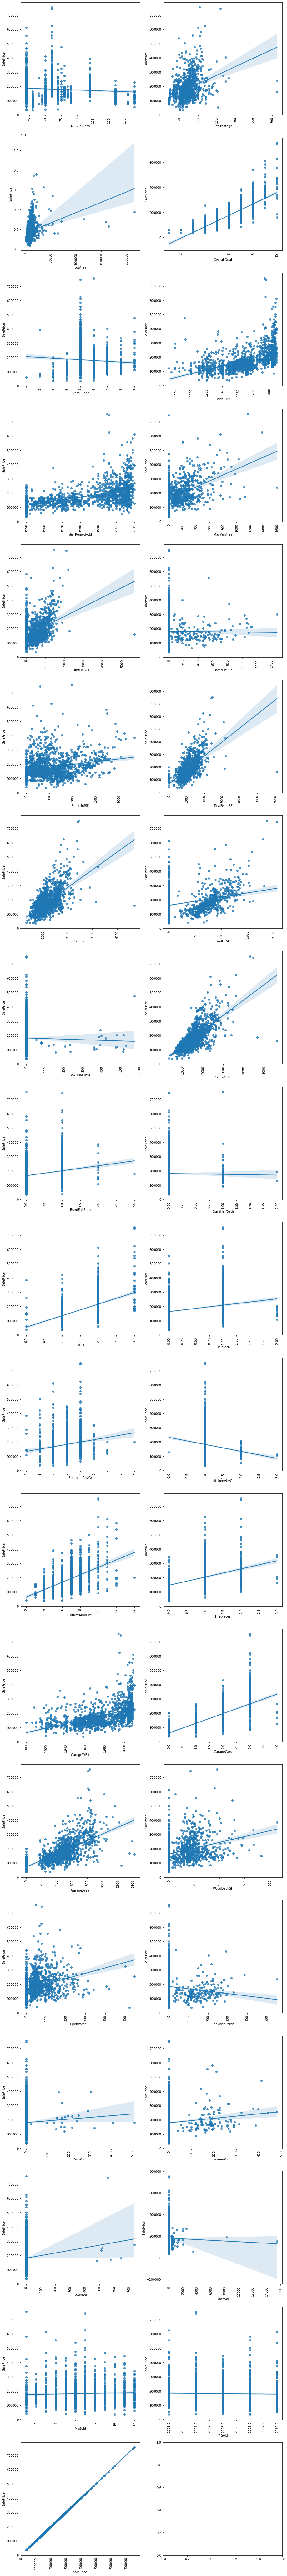

In [396]:
fig, axes = plt.subplots(numRows, numCols, figsize=(15, 150))

rowCount = 0
colCount = 0

for c in quant_cols:
    axes[rowCount, colCount].tick_params(axis='x', rotation=90)
    sns.regplot(ax=axes[rowCount, colCount], data=train_quant_df_temp, x=c, y=y_temp)
    colCount += 1
    if (colCount == numCols):
        colCount = 0
        rowCount += 1
        if (rowCount == numRows):
            break

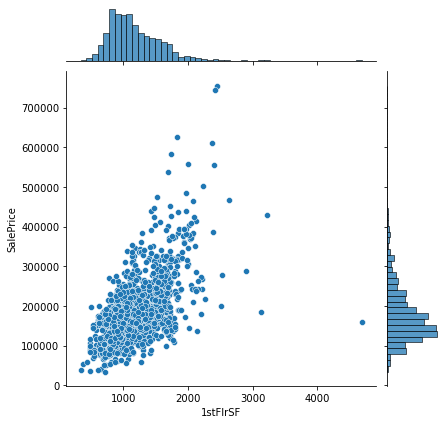

In [190]:
salePriceLog = np.log(train_df['SalePrice'])
grLivAreaLog = np.log(train_df['GrLivArea'])
firstFlrSFLog = np.log(train_df['1stFlrSF'])

sns.jointplot(x=np.exp(firstFlrSFLog), y=np.exp(salePriceLog))


**Let's look at category outliers in respect to the dependent variable (SalePrice).**

In [106]:
 # get a list of qualitative columns in the training set, where colume type = 'object'
train_qual_df_temp = train_df[qual_cols].copy() # get a dataframe of qualitative columns
train_qual_df_temp = train_qual_df.fillna('NONE') # data cleaning: fill any null cells in the dataframe with NONE

**Create a boxplot of each qualitative feature relative to the dependent varialble (SalePrice).**

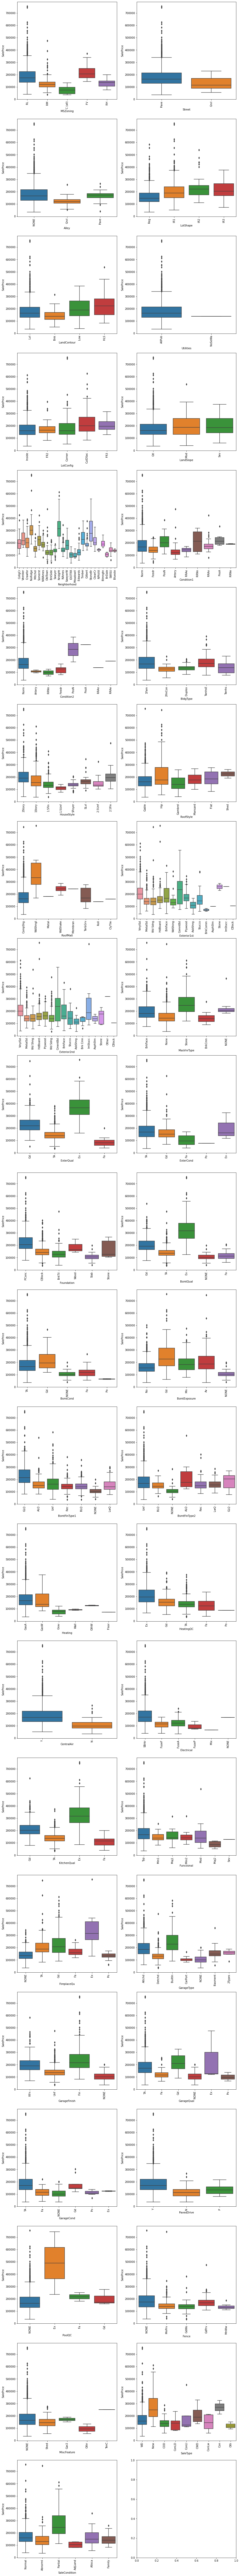

In [108]:
# create a boxplot of each qualitative feature relative to the dependent varialble (SalePrice)
numCols = 2
numRows = int((len(qual_cols)/numCols))
if (len(qual_cols)%numCols > 0):
    numRows += 1

rowCount = 0
colCount = 0

fig, axes = plt.subplots(numRows, numCols, figsize=(15, 180))

for c in train_qual_df_temp:
    if (c != 'SalePrice'):
        axes[rowCount, colCount].tick_params(axis='x', rotation=90)
        sns.boxplot(ax=axes[rowCount, colCount], data=train_qual_df_temp, x=c, y=y_temp)
        colCount += 1
        if (colCount == numCols):
            colCount = 0
            rowCount += 1
            if (rowCount == numRows):
                break


**In regards to outliers, let us look at SaleType in regards to SalePrice.**

<AxesSubplot:xlabel='SaleType', ylabel='SalePrice'>

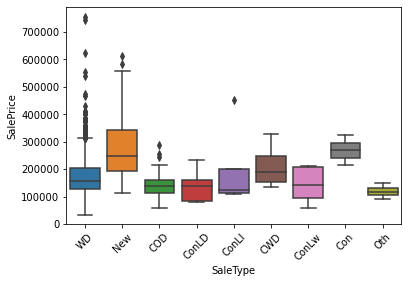

In [109]:

ax = sns.boxplot(data=train_qual_df_temp, x='SaleType', y=y_temp)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax


In [111]:
train_qual_df_temp.groupby('SaleType').SalePrice.describe()


,count,mean,std,min,25%,50%,75%,max
SaleType,,,,,,,,
COD,43.0,143973.255814,47098.294314,60000.0,112000.00,139000.0,160500.00,287000.0
CWD,4.0,210600.000000,86421.486526,136000.0,152500.00,188750.0,246850.00,328900.0
Con,2.0,269600.000000,76933.217793,215200.0,242400.00,269600.0,296800.00,324000.0
ConLD,9.0,138780.888889,53876.560647,79900.0,85000.00,140000.0,160000.00,235128.0
ConLI,5.0,200390.000000,145282.519595,110000.0,115000.00,125000.0,200000.00,451950.0
ConLw,5.0,143700.000000,67291.901444,60000.0,95000.00,144000.0,207500.00,212000.0
New,122.0,274945.418033,103239.582158,113000.0,194050.25,247453.0,341919.75,611657.0
Oth,3.0,119850.000000,28441.035495,93500.0,104775.00,116050.0,133025.00,150000.0
WD,1267.0,173401.836622,71129.686245,34900.0,128925.00,158000.0,202950.00,755000.0


**Most home sales are done via 'Warranty Deed - Conventional', with many high outliers far from the overall median and average SalePrice. That being said, new home sales look to be more wider but pricer range of homes, and few high outliers.**

**Let's observe Kitchen Quality outliers in regards to Sale Price.**

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

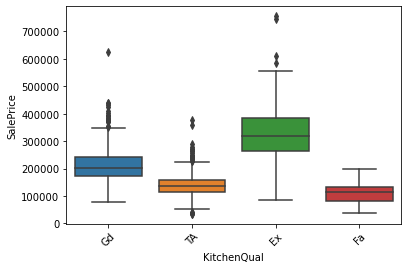

In [112]:
ax = sns.boxplot(data=train_qual_df_temp, x='KitchenQual', y=y_temp)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
ax


In [113]:
train_qual_df_temp.groupby('KitchenQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
Ex,100.0,328554.670000,120862.942573,86000.0,263474.0,316750.0,385312.5,755000.0
Fa,39.0,105565.205128,36004.254037,39300.0,81000.0,115000.0,131500.0,200000.0
Gd,586.0,212116.023891,64020.176702,79000.0,172500.0,201400.0,242750.0,625000.0
TA,735.0,139962.511565,38896.280336,34900.0,116025.0,137000.0,160000.0,375000.0


**Higher levels of kitchen quality tend to yield higher-than-average or median sale prices, with many outliers to show in the Good and Excellent categories.**

**Let's look at training data correlation in respect to SalePrice.**

In [691]:
corr_matrix = train_df.corr()
corr_matrix_sorted = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_matrix_sorted

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

**Let's create a bar chart of quantitative correlations.**

<AxesSubplot:>

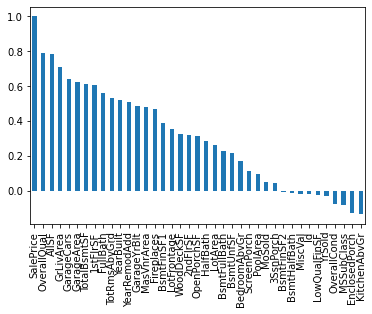

In [225]:
corr_matrix_sorted.plot(kind='bar')

### Predictor 1

**'Neighborhood' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

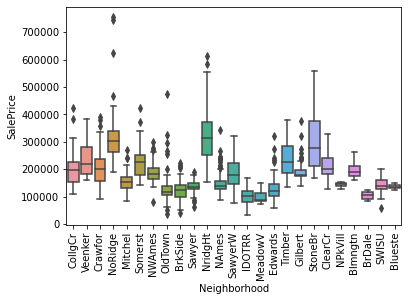

In [694]:
ax = sns.boxplot(data=train_df, x='Neighborhood', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [695]:
train_df.groupby('Neighborhood').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
Blmngtn,17.0,194870.882353,30393.229219,159895.0,174000.00,191000.0,213490.00,264561.0
Blueste,2.0,137500.000000,19091.883092,124000.0,130750.00,137500.0,144250.00,151000.0
BrDale,16.0,104493.750000,14330.176493,83000.0,91000.00,106000.0,118000.00,125000.0
BrkSide,58.0,124834.051724,40348.689270,39300.0,100500.00,124300.0,141175.00,223500.0
ClearCr,28.0,212565.428571,50231.538993,130000.0,183750.00,200250.0,242225.00,328000.0
CollgCr,150.0,197965.773333,51403.666438,110000.0,152958.75,197200.0,225725.00,424870.0
Crawfor,51.0,210624.725490,68866.395472,90350.0,159250.00,200624.0,239000.00,392500.0
Edwards,100.0,128219.700000,43208.616459,58500.0,101500.00,121750.0,145225.00,320000.0
Gilbert,79.0,192854.506329,35986.779085,141000.0,174000.00,181000.0,197200.00,377500.0


**From the boxplot and chart above, it looks like 'NridgHt' is the most expensive neighborhood with the highest median.**

In [696]:
train_df.groupby(['Neighborhood']).SalePrice.median().sort_values(ascending=False)

Neighborhood
NridgHt    315000.0
NoRidge    301500.0
StoneBr    278000.0
Timber     228475.0
Somerst    225500.0
Veenker    218000.0
Crawfor    200624.0
ClearCr    200250.0
CollgCr    197200.0
Blmngtn    191000.0
NWAmes     182900.0
Gilbert    181000.0
SawyerW    179900.0
Mitchel    153500.0
NPkVill    146000.0
NAmes      140000.0
SWISU      139500.0
Blueste    137500.0
Sawyer     135000.0
BrkSide    124300.0
Edwards    121750.0
OldTown    119000.0
BrDale     106000.0
IDOTRR     103000.0
MeadowV     88000.0
Name: SalePrice, dtype: float64

### Predictor 2

**'HeatingQC' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**

<AxesSubplot:xlabel='HeatingQC', ylabel='SalePrice'>

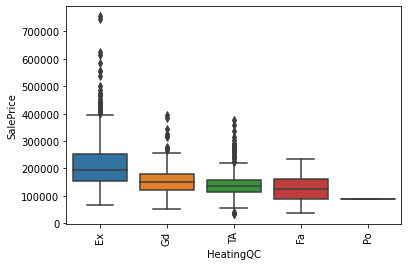

In [697]:
ax = sns.boxplot(data=train_df, x='HeatingQC', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

**The Majority of homes have Excellent, Good, and Average heating quality.**

In [698]:
train_df.groupby('HeatingQC').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
HeatingQC,,,,,,,,
Ex,741.0,214914.429150,87469.704503,66500.0,154900.0,194700.0,252000.0,755000.0
Fa,49.0,123919.489796,50306.618996,37900.0,87000.0,123500.0,161000.0,235000.0
Gd,241.0,156858.871369,52923.920003,52000.0,122500.0,152000.0,179200.0,395000.0
Po,1.0,87000.000000,NaN,87000.0,87000.0,87000.0,87000.0,87000.0
TA,428.0,142362.876168,47226.485663,34900.0,115000.0,135000.0,158925.0,375000.0


**Higher heating quality and condition seem to yield higher SalePrice.**

In [114]:
train_df.groupby(['HeatingQC']).SalePrice.median().sort_values(ascending=False)

HeatingQC
Ex    194700.0
Gd    152000.0
TA    135000.0
Fa    123500.0
Po     87000.0
Name: SalePrice, dtype: float64

### Predictor 3

**'GrLivArea' has a high continuous quantitative correlation with 'SalePrice', let's create a marginal scatterplot and .describe() its relationship:**

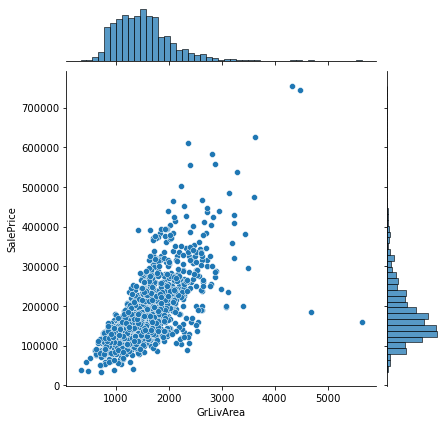

In [702]:
sns.jointplot(x="GrLivArea", y="SalePrice", data=train_df);

In [703]:
train_df.groupby('GrLivArea').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
GrLivArea,,,,,,,,
334,1.0,39300.0,NaN,39300.0,39300.0,39300.0,39300.0,39300.0
438,1.0,60000.0,NaN,60000.0,60000.0,60000.0,60000.0,60000.0
480,1.0,35311.0,NaN,35311.0,35311.0,35311.0,35311.0,35311.0
520,1.0,68500.0,NaN,68500.0,68500.0,68500.0,68500.0,68500.0
605,1.0,86000.0,NaN,86000.0,86000.0,86000.0,86000.0,86000.0
...,...,...,...,...,...,...,...,...
3627,1.0,625000.0,NaN,625000.0,625000.0,625000.0,625000.0,625000.0
4316,1.0,755000.0,NaN,755000.0,755000.0,755000.0,755000.0,755000.0
4476,1.0,745000.0,NaN,745000.0,745000.0,745000.0,745000.0,745000.0


**GrLivingArea seems to correlate well with SalePrice, including most outliers, with the exception of two larger homes with a Sale Price seem to be just over the median or average.**

### Predictor 4

**'OverallQual' has a high discrete quantitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

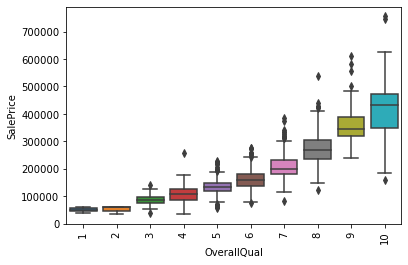

In [704]:
ax = sns.boxplot(data=train_df, x='OverallQual', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [705]:
train_df.groupby(['OverallQual']).SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
OverallQual,,,,,,,,
1,2.0,50150.000000,15344.217152,39300.0,44725.0,50150.0,55575.0,61000.0
2,3.0,51770.333333,14254.200796,35311.0,47655.5,60000.0,60000.0,60000.0
3,20.0,87473.750000,24688.567399,37900.0,75500.0,86250.0,97500.0,139600.0
4,116.0,108420.655172,29022.003886,34900.0,88000.0,108000.0,125500.0,256000.0
5,397.0,133523.347607,27107.330927,55993.0,118000.0,133000.0,147000.0,228950.0
6,374.0,161603.034759,36090.182933,76000.0,139125.0,160000.0,181000.0,277000.0
7,319.0,207716.423197,44466.259414,82500.0,179470.0,200141.0,230750.0,383970.0
8,168.0,274735.535714,63898.902253,122000.0,234557.5,269750.0,306250.0,538000.0
9,43.0,367513.023256,81278.174849,239000.0,318980.5,345000.0,389716.0,611657.0


In [706]:
train_df.groupby(['OverallQual']).SalePrice.median().sort_values(ascending=False)

OverallQual
10    432390.0
9     345000.0
8     269750.0
7     200141.0
6     160000.0
5     133000.0
4     108000.0
3      86250.0
2      60000.0
1      50150.0
Name: SalePrice, dtype: float64

**While homes with OverallQual to be 9 or 10 yield high home prices, they are also not very common compared to homes with lower overall quality rates as low as 4.**

### Predictor 5

**'SaleCondition' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**

<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

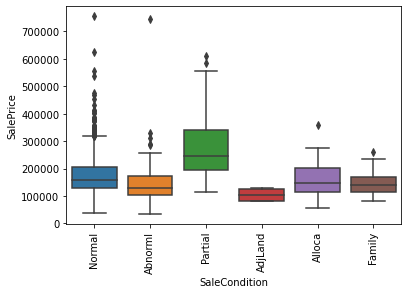

In [707]:
ax = sns.boxplot(data=train_df, x='SaleCondition', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [708]:
train_df.groupby('SaleCondition').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
SaleCondition,,,,,,,,
Abnorml,101.0,146526.623762,82796.213395,34900.0,104000.00,130000.0,172500.0,745000.0
AdjLand,4.0,104125.000000,26135.464411,81000.0,81750.00,104000.0,126375.0,127500.0
Alloca,12.0,167377.416667,84460.527502,55993.0,116383.25,148145.0,202043.0,359100.0
Family,20.0,149600.000000,47820.002421,82500.0,115500.00,140500.0,170250.0,259000.0
Normal,1198.0,175202.219533,69713.636280,39300.0,130000.00,160000.0,205000.0,755000.0
Partial,125.0,272291.752000,103696.404119,113000.0,193879.00,244600.0,339750.0,611657.0


**Though 'Partial' has a couple of max outliers, the sale condition yields the highest median sale price. That said, most of the sale conditionss are overwhelmingly 'normal' compared to other sale condition types.**

### Predictor 6

**'KitchenQual' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**

<AxesSubplot:xlabel='KitchenQual', ylabel='SalePrice'>

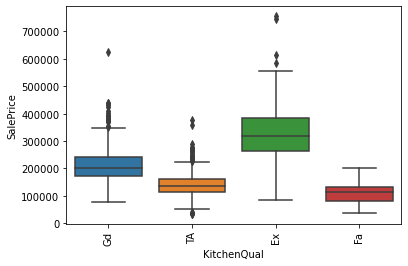

In [245]:
ax = sns.boxplot(data=train_df, x='KitchenQual', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax

In [246]:
train_df.groupby('KitchenQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
Ex,100.0,328554.670000,120862.942573,86000.0,263474.0,316750.0,385312.5,755000.0
Fa,39.0,105565.205128,36004.254037,39300.0,81000.0,115000.0,131500.0,200000.0
Gd,586.0,212116.023891,64020.176702,79000.0,172500.0,201400.0,242750.0,625000.0
TA,735.0,139962.511565,38896.280336,34900.0,116025.0,137000.0,160000.0,375000.0


### Predictor 7

**'ExterQual' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**




<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

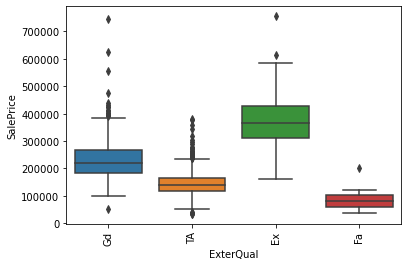

In [250]:
ax = sns.boxplot(data=train_df, x='ExterQual', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax


In [251]:
train_df.groupby('ExterQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
ExterQual,,,,,,,,
Ex,52.0,367360.961538,116401.264200,160000.0,311404.0,364606.5,428788.50,755000.0
Fa,14.0,87985.214286,39826.918794,39300.0,60250.0,82250.0,102000.00,200000.0
Gd,488.0,231633.510246,71188.873899,52000.0,185000.0,220000.0,265984.25,745000.0
TA,906.0,144341.313466,42471.815703,34900.0,118589.5,139450.0,165500.00,381000.0


### Predictor 8

**'BsmtQual' has a high qualitative correlation with 'SalePrice', let's create a box plot and .describe() its relationship:**





<AxesSubplot:xlabel='BsmtQual', ylabel='SalePrice'>

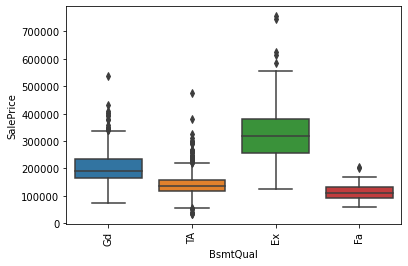

In [252]:
ax = sns.boxplot(data=train_df, x='BsmtQual', y='SalePrice')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax


In [253]:
train_df.groupby('BsmtQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
BsmtQual,,,,,,,,
Ex,121.0,327041.041322,113563.237392,123500.0,255500.0,318000.0,378500.0,755000.0
Fa,35.0,115692.028571,34469.667278,61000.0,91400.0,112000.0,133500.0,206900.0
Gd,618.0,202688.478964,58092.364284,75500.0,165100.0,192070.0,234000.0,538000.0
TA,649.0,140759.818182,43483.265311,34900.0,117000.0,135500.0,158000.0,475000.0


**All but 8 homes (8/1460 which is about 0.55%) in the training set do not have basements (TotalBsmtSF = 0), making basements in the Ames, Iwoa area a pretty common feature, in which we should include BsmtQual in the list of potential predcitors.**

- **Create at least one feature from the data set.**

### Feature 1

**Let's create new attribute 'TotalSF' which is TotalBsmtSF, 1stFlrSF, and 2ndFlrSF combined.**

In [115]:
train_df_copy = train_df.copy()

In [116]:
train_df_copy['TotalSF'] = train_df_copy['TotalBsmtSF'] + train_df_copy['1stFlrSF'] + train_df_copy['2ndFlrSF']

**Here is a scatterplot and marginal distribution of TotalSF in respect to SalePrice.**

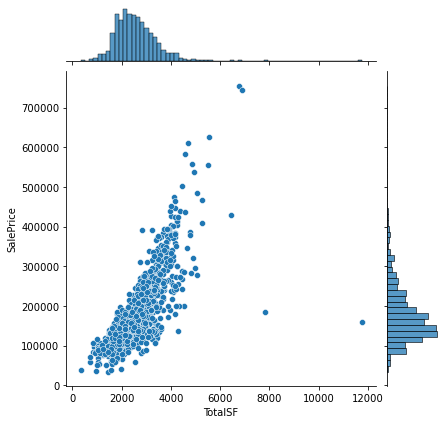

In [117]:
sns.jointplot(x="TotalSF", y="SalePrice", data=train_df_copy)

**TotalSF has a very high correlation value to SalePrice, even greater than that of GrLivArea.**

### Feature 2

**Let's create new attribute 'Age2022' which is 2022 (current year of this notebook) - YearBuilt.**

In [118]:
train_df_copy['Age2022'] = 2022 - train_df_copy['YearBuilt']

**Here is a scatterplot and marginal distribution of Age2022 in respect to SalePrice.**

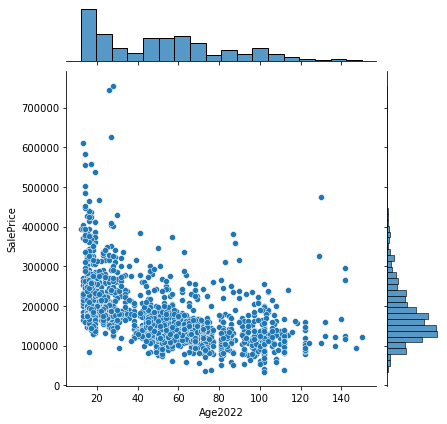

In [119]:
sns.jointplot(x="Age2022", y="SalePrice", data=train_df_copy)

**Age2022 has a pretty negative corelation to Sale price, with newer homes yielding much higher sale prices. It seems that most older homes yield lower sale prices. It is the exact negative correlation to YearBuilt. With that in mind, when it comes to feature selection, we should choose either YearBuilt or Age2022, but not use both in a model.**

**MinMax Scaling: comparing GrLivArea and OverallQual in respect to the dependent variable (SalePrice)**

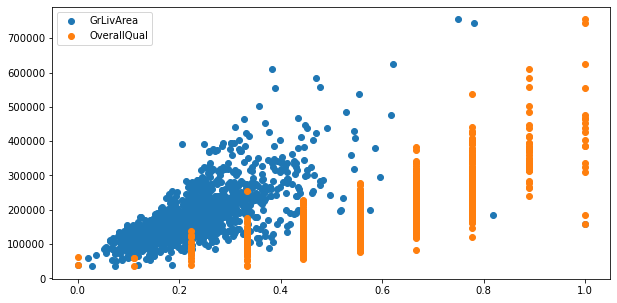

In [714]:
features = ['GrLivArea','OverallQual']
features_df = train_df[features]

scaler = MinMaxScaler()
minmax_features = scaler.fit_transform(features_df)
sale_price = train_df["SalePrice"]

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=minmax_features[:,0], y=sale_price)
ax.scatter(x=minmax_features[:,1], y=sale_price)

ax.legend(features)

**MainMax scaling logarithmic tranformation: helps with mitigating TotalSF's distribution more towards OverallQual's general distribution than its outliers.**

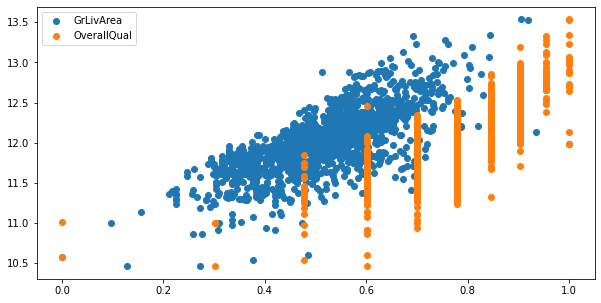

In [715]:
features = ['GrLivArea','OverallQual']
features_df = train_df[features]
features_df_log = np.log(features_df)

scaler = MinMaxScaler()
minmax_features = scaler.fit_transform(features_df_log)
sale_price_log = np.log(train_df["SalePrice"])

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=minmax_features[:,0], y=sale_price_log)
ax.scatter(x=minmax_features[:,1], y=sale_price_log)

ax.legend(features)

**Standard Scaling: comparing TotalSF and OverallQual in respect to the dependent variable (SalePrice)**

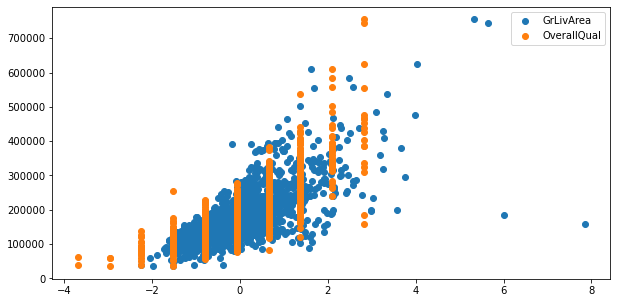

In [716]:
features = ['GrLivArea','OverallQual']
features_df = train_df[features]

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features_df)
sale_price = train_df["SalePrice"]

fig, ax = plt.subplots(figsize=(10, 5))
for idx, val in enumerate(features):
    ax.scatter(x=standardized_features[:,idx], y=sale_price)
ax.legend(features)


**Standard scaling logarithmic tranformation: doesn't have as much of a dramatic effect with the MinMax logarithmic transformation as the distributions were already more in line with each other before transformation.**

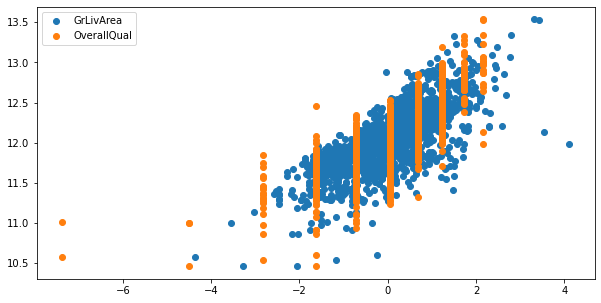

In [717]:
features = ['GrLivArea','OverallQual']
features_df = train_df[features]
features_df_log = np.log(features_df)

scaler = StandardScaler()
standardized_features_log = scaler.fit_transform(features_df_log)
sale_price_log = np.log(train_df["SalePrice"])

fig, ax = plt.subplots(figsize=(10, 5))
for idx, val in enumerate(features):
    ax.scatter(x=standardized_features_log[:,idx], y=sale_price_log)
ax.legend(features)


**Let's enumerate KitchenQual and compare it to OverallQual in respect to SalePrice.**

In [718]:
train_df.groupby('KitchenQual').SalePrice.describe()

,count,mean,std,min,25%,50%,75%,max
KitchenQual,,,,,,,,
Ex,100.0,328554.670000,120862.942573,86000.0,263474.0,316750.0,385312.5,755000.0
Fa,39.0,105565.205128,36004.254037,39300.0,81000.0,115000.0,131500.0,200000.0
Gd,586.0,212116.023891,64020.176702,79000.0,172500.0,201400.0,242750.0,625000.0
TA,735.0,139962.511565,38896.280336,34900.0,116025.0,137000.0,160000.0,375000.0


In [719]:
def kitchenQualNumConverter(qual):
    if (qual == 'Ex'):
        return 4
    if (qual == 'Gd'):
        return 3
    if (qual == 'TA'):
        return 2
    if (qual =='Fa'):
        return 1
    if (qual == 'Po'):
        return 0
    else:
        return None

In [720]:
kitchenQualEnc = []

for idx, row in train_df.iterrows():
    kitchenQualEnc.append(kitchenQualNumConverter(row.KitchenQual))

train_df['KitchenQualEnc'] = kitchenQualEnc

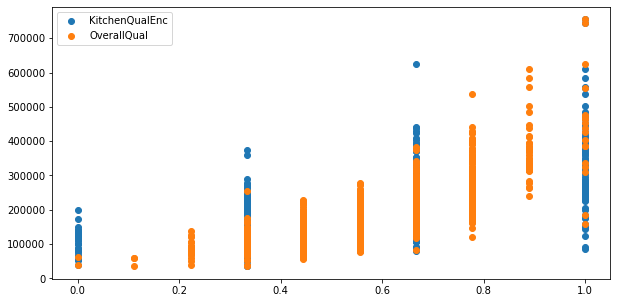

In [721]:
features = ['KitchenQualEnc','OverallQual']
features_df = train_df[features]

scaler = MinMaxScaler()
minmax_features = scaler.fit_transform(features_df)
sale_price = train_df["SalePrice"]

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x=minmax_features[:,0], y=sale_price)
ax.scatter(x=minmax_features[:,1], y=sale_price)

ax.legend(features)

**With MinMax Scaling, since there are no homes in the training data with 'Poor' Kitchen quality, the next-to-last category 'Fair' is placed at the end and is matched to OverallQual's 'very poor' rating. Let's try it with Standardized Scaling.**

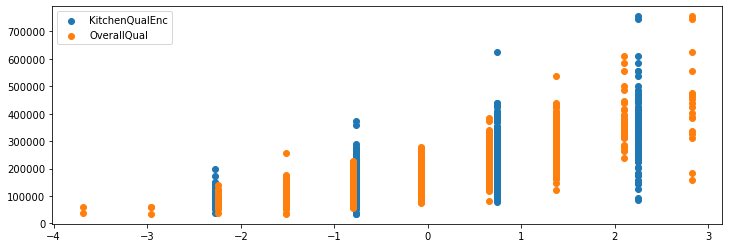

In [722]:
features = ['KitchenQualEnc','OverallQual']
features_df = train_df[features]

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features_df)
sale_price = train_df["SalePrice"]

fig, ax = plt.subplots(figsize=(12, 4))
for idx, val in enumerate(features):
    ax.scatter(x=standardized_features[:,idx], y=sale_price)
ax.legend(features)

**Standard Scaling lines up both Overall Quality and Kitchen Quality 'Fair' ratings and gives matches both categories well in distribution.**

**Let's compare GrLivArea to to homes with garge space (square foot and number of cars) in respect to Sale Price.**

In [723]:
# filters homes in training set that have garage space
garage_df = train_df[train_df['GarageArea'] > 0]

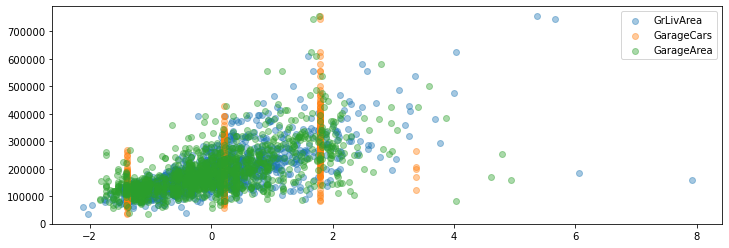

In [724]:
features = ['GrLivArea','GarageCars', 'GarageArea']
features_df = garage_df[features]

scaler = StandardScaler()
standardized_features = scaler.fit_transform(features_df)
sale_price = garage_df["SalePrice"]

fig, ax = plt.subplots(figsize=(12, 4))
for idx, val in enumerate(features):
    ax.scatter(x=standardized_features[:,idx], y=sale_price, alpha=0.4)
ax.legend(features)

**it seems that pricier homes have 2 and 3 car garages. Ther are some exceptional homes that are not as pricey with 4-car garages, at most just under \\$300,000.**

- **Conduct your analysis using a cross-validation design.**

**Performing K-Fold cross-validation (K = 5 folds) on the quantitative features:**

In [120]:
# prepare the data:
# get a copy of the training dataframe
train_df_cv = train_df.copy()

# get the quantitative fields
train_df_cv_quant = train_df_cv[quant_cols].copy()

# get a copy of the dependent varaible results and drop it from the training set
y_cv = train_df_cv_quant['SalePrice']
train_df_cv_quant.drop(['SalePrice'], axis=1, inplace=True)

# data cleaning
train_df_cv_quant['LotFrontage'] = train_df_cv_quant['LotFrontage'].fillna(0)
train_df_cv_quant['MasVnrArea'] = train_df_cv_quant['MasVnrArea'].fillna(0)
train_df_cv_quant.drop(['GarageYrBlt'], axis=1, inplace=True)

In [121]:
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)
score = cross_val_score(LinearRegression(), train_df_cv_quant, y_cv, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.82757673 0.82017463 0.8544053  0.79085194 0.62747266 0.33451581
 0.82584018 0.88458985 0.8517622  0.8850862 ]
Accuracy: 0.77 (+/- 0.32)


In [122]:
x_train,x_val,y_train,y_val=train_test_split(train_df_cv_quant,y_cv,test_size=0.3,random_state=42)
linear_model = LinearRegression().fit(x_train,y_train)

In [123]:
linear_model.score(x_train,y_train)

0.8000794753818734

In [124]:
linear_model.score(x_val,y_val)

0.8232624354170155

In [125]:
y_pred = linear_model.predict(x_val)

In [126]:
mean_squared_error(y_val, y_pred)

1233291296.7401316

## MODELING

- **Transform and feature engineer as appropriate.**

**Let's add the new 'TotalSF' quantitative feature to the training set.**

In [1034]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']

### Feature Selection

**Let us perform feature selection based on the high correlation to Sale Price (either >0.45 or < -0.45) and same of the qualitative predictors described earlier ("HeatingQC", "KitchenQual", "ExterQual", "Neighborhood").**

In [1035]:
feat_sel_quant_cols = list(train_df.corr()["SalePrice"][(train_df.corr()["SalePrice"]>0.45) | (train_df.corr()["SalePrice"]<-0.45)].index)
feat_sel_qual_cols = ["HeatingQC", "KitchenQual", "ExterQual", "Neighborhood"]
feature_selection = feat_sel_quant_cols + feat_sel_qual_cols

In [1036]:
feat_sel_quant_cols

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice',
 'TotalSF']

**Let's encode the Neighborhood data based on five tiers in respect to SalePrice.**

In [1037]:
# create categories for Neighborhoods
# Category 2 Neighborhoods are mid-tier in respect to the dependent variable (SalePrice)

neighborhoodCat1 = ['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards']

neighborhoodCat2 = ['BrkSide', 'Sawyer', 'Blueste', 'SWISU', 'NAmes']

neighborhoodCat3 = ['NPkVill', 'Mitchel', 'SawyerW', 'Gilbert', 'NWAmes']

neighborhoodCat4 = ['Blmngtn', 'CollgCr', 'ClearCr', 'Crawfor', 'Veenker']
# Category 3 Neighborhoods are the top-three neighborhoods with the highest median in respect to the 
# dependent variable (SalePrice)
neighborhoodCat5 = ['Somerst', 'Timber','StoneBr', 'NoRidge', 'NridgHt']

# ecnoder to enumerate the following categories:
# HeatingQC, KitchenQual, ExterQual
def neighborhoodEncoder(neighborhood):
    if (neighborhood in neighborhoodCat2):
        return 2
    elif (neighborhood in neighborhoodCat3):
        return 3
    elif (neighborhood in neighborhoodCat4):
        return 4
    elif (neighborhood in neighborhoodCat5):
        return 5
    else:
        return 1


In [1039]:
neighborhoodEnc = []
for idx, row in train_df.iterrows():
    neighborhoodEnc.append(neighborhoodEncoder(row.Neighborhood))

train_df['NeighborhoodEnc'] = neighborhoodEnc

**Like kitchenQualNumConverter() above in the notebook, let's create a general quality encoder for HeatingQC, KitchenQual, and ExterQual.**

In [1040]:
# ecnoder to enumerate the following categories:
# HeatingQC, KitchenQual, ExterQual
def qcEncoder(qual):
    if (qual == 'Ex'):
        return 4
    elif (qual == 'Gd'):
        return 3
    elif (qual == 'TA'):
        return 2
    elif (qual =='Fa'):
        return 1
    elif (qual == 'Po'):
        return 0
    else:
        return 0

In [1041]:
kitchenQualEnc = []
heatingQCEnc = []
exterQualEnc = []

for idx, row in train_df.iterrows():
    kitchenQualEnc.append(qcEncoder(row.KitchenQual))
    heatingQCEnc.append(qcEncoder(row.HeatingQC))
    exterQualEnc.append(qcEncoder(row.ExterQual))

train_df['KitchenQualEnc'] = kitchenQualEnc
train_df['HeatingQCEnc'] = heatingQCEnc
train_df['ExterQualEnc'] = exterQualEnc


In [1042]:
feat_sel_qual_enc_cols = ["HeatingQCEnc", "KitchenQualEnc", "ExterQualEnc", "NeighborhoodEnc"]

- **Build models with many variables.**

## Model 1: Feature Selection

**This is our main feature selection.**

In [1043]:
feature_selection = feat_sel_quant_cols + feat_sel_qual_enc_cols
feature_selection.remove("GarageYrBlt") # not all homes have garages and it is a numerical year so let's remove for now.
feature_selection.remove("SalePrice") # remove the dependent variable, can still get if from the original training set

In [1044]:
feature_selection

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'TotalSF',
 'HeatingQCEnc',
 'KitchenQualEnc',
 'ExterQualEnc',
 'NeighborhoodEnc']

In [1045]:
# some basic house-keeping method
def basic_data_cleaning(cols):
    df = train_df[cols].copy()
    # not all homes have Masonry Veneers
    # some listings without it have MasVnrArea = null instead of 0, let's clean
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    return df

### Regression Model 1: Linear Regression

**Let's build a linear regression model of the feature selections.**

In [1046]:
train_df_copy = basic_data_cleaning(feature_selection)
train_df_copy_y = train_df['SalePrice']

In [1047]:
train_df_copy.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,TotalSF,HeatingQCEnc,KitchenQualEnc,ExterQualEnc,NeighborhoodEnc
0,7,2003,2003,196.0,856,856,1710,2,8,0,2,548,2566,4,3,3,4
1,6,1976,1976,0.0,1262,1262,1262,2,6,1,2,460,2524,4,2,2,4
2,7,2001,2002,162.0,920,920,1786,2,6,1,2,608,2706,4,3,3,4
3,7,1915,1970,0.0,756,961,1717,1,7,1,3,642,2473,3,3,2,4
4,8,2000,2000,350.0,1145,1145,2198,2,9,1,3,836,3343,4,3,3,5


**Split training data into training and validation sets**

In [1048]:
x_train,x_val,y_train,y_val=train_test_split(train_df_copy,train_df_copy_y,test_size=0.3,random_state=42)
linear_model = LinearRegression().fit(x_train,y_train)

**Configure KFold settings to be used for cross-validation:**

In [1049]:
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

**Perform K-Fold cross-validation:**

In [1050]:
score = cross_val_score(LinearRegression(), x_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.79876651 0.88233245 0.79895807 0.79870269 0.77508742 0.34284603
 0.84720657 0.69643094 0.7667779  0.81998998]
Accuracy: 0.75 (+/- 0.29)


**Linear Regression**

In [1051]:
linear_model.score(x_train,y_train)

0.7896309558374102

In [1052]:
linear_model.score(x_val,y_val)

0.834011506866933

**Using a selection of fairly-correlated set of quantitative and qualitative features would make a fairly decent Sale Price predictor. With the linear model scoring just above 75% including KFold evaluation I feel it is a decent start given my introduction to Machine Learning so far in the course.**

<AxesSubplot:>

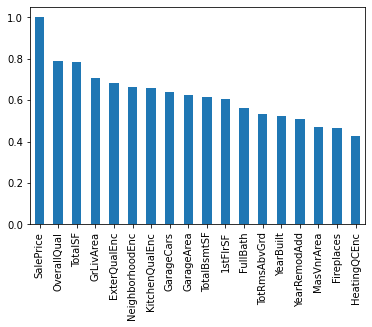

In [1053]:
df_copy = train_df_copy.copy()
df_copy['SalePrice'] = train_df_copy_y
corr_matrix = df_copy.corr()
corr_matrix_sorted = corr_matrix['SalePrice'].sort_values(ascending=False)
corr_matrix_sorted.plot(kind='bar')

In [1054]:
olsmodel = sm.OLS(train_df_copy_y,train_df_copy)
ols_results = olsmodel.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.969
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              2627.
Date:                Sun, 17 Apr 2022   Prob (F-statistic):                        0.00
Time:                        11:47:35   Log-Likelihood:                         -17346.
No. Observations:                1460   AIC:                                  3.473e+04
Df Residuals:                    1443   BIC:                                  3.482e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
OverallQual      1.167e+04   1242.661      9.389      0.000    9229.816    1.41e+04
YearBuilt         -66.9115     44.956     -1.488      0.137    -155.099      21.276
YearRemodAdd       15.2827     44.600      0.343      0.732     -72.204     102.770
MasVnrArea         30.5417      5.915      5.163      0.000      18.938      42.145
TotalBsmtSF       -13.1878     20.060     -0.657      0.511     -52.537      26.161
1stFlrSF           10.3207      4.641      2.224      0.026       1.217      19.425
GrLivArea          11.7533     19.594      0.600      0.549     -26.683      50.190
FullBath        -5659.2344   2444.502     -2.315      0.021   -1.05e+04    -864.076
TotRmsAbvGrd     1066.2150   1039.317      1.026      0.305    -972.519    3104.949
Fireplaces       8058.1924   1701.133      4.737      0.000    4721.235    1.14e+04
GarageCars       7332.7034   2832.355      2.589      0.010    1776.729    1.29e+04
GarageArea         11.1349      9.644      1.155      0.248      -7.783      30.053
TotalSF            29.6926     19.744      1.504      0.133      -9.038      68.423
HeatingQCEnc     1757.9141   1177.819      1.493      0.136    -552.506    4068.334
KitchenQualEnc    1.37e+04   2186.273      6.267      0.000    9412.940     1.8e+04
ExterQualEnc     9794.1098   2763.741      3.544      0.000    4372.730    1.52e+04
NeighborhoodEnc  1.087e+04   1022.117     10.638      0.000    8867.815    1.29e+04
==============================================================================
Omnibus:                      422.144   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45886.420
Skew:                           0.078   Prob(JB):                         0.00
Kurtosis:                      30.464   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- **Build at a minimum the following regression models:**
- - **Lasso**
- - **Ridge**
- - **ElasticNet**

### Regression Model 2: Lasso Regression

**Let's build a lasso regression model of the feature selections.**

**Perform Grid-Search Cross-Validation:**

In [1055]:
# Lasso hypertuning: alpha, tol, max_iter
lasso_param_grid = {'alpha': [820, 825],
                    'max_iter': [8000, 9000],
                    'tol': [0.1,0.01,0.001,0.0001]
                   }
lasso_cv = GridSearchCV(Lasso(), cv=kf, param_grid=lasso_param_grid, scoring='r2')
lasso_results = lasso_cv.fit(x_train, y_train)

In [1056]:
lasso_results.best_score_

0.7542365876890159

In [1057]:
lasso_results.best_params_

{'alpha': 820, 'max_iter': 8000, 'tol': 0.01}

**K-Fold cross-validation**

In [1058]:
lasso_alpha = lasso_results.best_params_['alpha']
lasso_max_iter = lasso_results.best_params_['max_iter']
lasso_tol = lasso_results.best_params_['tol']

score = cross_val_score(Lasso(alpha=lasso_alpha, max_iter=lasso_max_iter, tol=lasso_tol), x_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.79584368 0.87989348 0.81447735 0.80410577 0.78706101 0.34554397
 0.84431772 0.68998658 0.76339352 0.8177428 ]
Accuracy: 0.7542 (+/- 0.2885)


In [1059]:
lasso_model = Lasso(lasso_alpha, max_iter=lasso_max_iter, tol=lasso_tol)
lasso_model.fit(x_train, y_train)
lasso_model.score(x_train, y_train)

0.7866006326205737

In [1060]:
lasso_model.score(x_val,y_val)

0.8332605853478081

### Regression Model 3: Ridge Regression

**Let's build a ridge regression model of the feature selections.**

**Perform Grid-Search Cross-Validation:**

In [1061]:
# Ridge hypertuning: alpha, tol, max_iter
ridge_param_grid = {'alpha': [75, 77],
                    'max_iter': [50],
                    'tol': [0.5, 0.48, 0.6]
                   }
ridge_cv = GridSearchCV(Ridge(), cv=kf, param_grid=ridge_param_grid, scoring='r2')
ridge_results = ridge_cv.fit(x_train, y_train)

In [1062]:
ridge_results.best_score_

0.7547522558003429

In [1063]:
ridge_results.best_params_

{'alpha': 75, 'max_iter': 50, 'tol': 0.5}

**K-Fold cross-validation**

In [1064]:
ridge_alpha = ridge_results.best_params_['alpha']
ridge_max_iter = ridge_results.best_params_['max_iter']
ridge_tol = ridge_results.best_params_['tol']

score = cross_val_score(Ridge(alpha=ridge_alpha, max_iter=ridge_max_iter, tol=ridge_tol), x_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.80143339 0.88247701 0.80996715 0.80528562 0.78266351 0.33918343
 0.84701726 0.69399649 0.76482962 0.82066909]
Accuracy: 0.7548 (+/- 0.2927)


In [1065]:
ridge_model = Ridge(alpha=ridge_alpha, max_iter=ridge_max_iter, tol=ridge_tol)
ridge_model.fit(x_train, y_train)
ridge_model.score(x_train,y_train)

0.788666902270343

In [1066]:
ridge_model.score(x_val,y_val)

0.8341747490174816

### Regression Model 4: ElasticNet Regression

**Let's build a elastic-net regression model of the feature selections.**

- **Conduct hyperparameter tuning for the ElasticNet.**

**Perform Grid-Search Cross-Validation:**

In [1067]:
# ElasticNet hypertuning: alpha, tol, max_iter
elasticnet_param_grid = {'alpha': [0.23, 0.25], 
              'tol': [0.08, 0.085],
              'max_iter': [5000]}
elasticnet_cv = GridSearchCV(ElasticNet(), cv=kf, param_grid=elasticnet_param_grid, scoring='r2')
elasticnet_results = elasticnet_cv.fit(x_train, y_train)

In [1068]:
elasticnet_results.best_score_

0.7545880486716073

In [1069]:
elasticnet_results.best_params_

{'alpha': 0.23, 'max_iter': 5000, 'tol': 0.085}

**K-Fold cross-validation**

In [1070]:
elasticnet_alpha = elasticnet_results.best_params_['alpha']
elasticnet_max_iter = elasticnet_results.best_params_['max_iter']
elasticnet_tol=elasticnet_results.best_params_['tol']

score = cross_val_score(Lasso(alpha=elasticnet_alpha, max_iter=elasticnet_max_iter, tol=elasticnet_tol), 
                        x_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f (+/- %0.4f)" % (score.mean(), score.std() * 2))

Scores for each fold: [0.79876638 0.8823329  0.79896432 0.79870491 0.77509148 0.34283824
 0.8472064  0.69642876 0.76677721 0.8199901 ]
Accuracy: 0.7527 (+/- 0.2888)


In [1071]:
elasticNet_model = ElasticNet(alpha=elasticnet_alpha, max_iter=elasticnet_max_iter, tol=elasticnet_tol)
elasticNet_model.fit(x_train, y_train)
elasticNet_model.score(x_train, y_train)

0.7877730036164299

In [1072]:
elasticNet_model.score(x_val, y_val)

0.8338162050325955

### SUBMISSION

In [1073]:
def test_data_transformation(train_df_copy):
    test_features = train_df_copy.columns.values
    # transform the test data based on what was done to the training data
    test_df_copy = test_df.copy()
    # basic data cleaning
    test_df_copy['MasVnrArea'] = test_df_copy['MasVnrArea'].fillna(0)
    test_df_copy['TotalBsmtSF'] = test_df_copy['TotalBsmtSF'].fillna(0)
    test_df_copy['GarageCars'] = test_df_copy['GarageCars'].fillna(0)
    test_df_copy['GarageArea'] = test_df_copy['GarageArea'].fillna(0)
    # creating feature: TotalSF
    test_df_copy['TotalSF'] = test_df_copy['TotalBsmtSF'] + test_df_copy['1stFlrSF'] + test_df_copy['2ndFlrSF']

    # encoding a small selection of highly-correlated categorial features: Neighborhood, KitchenQual, HeatingQC, ExterQual
    neighborhoodEnc = []
    kitchenQualEnc = []
    heatingQCEnc = []
    exterQualEnc = []
    for idx, row in test_df_copy.iterrows():
        neighborhoodEnc.append(neighborhoodEncoder(row.Neighborhood))
        kitchenQualEnc.append(qcEncoder(row.KitchenQual))
        heatingQCEnc.append(qcEncoder(row.HeatingQC))
        exterQualEnc.append(qcEncoder(row.ExterQual))

    test_df_copy['NeighborhoodEnc'] = neighborhoodEnc
    test_df_copy['KitchenQualEnc'] = kitchenQualEnc
    test_df_copy['HeatingQCEnc'] = heatingQCEnc
    test_df_copy['ExterQualEnc'] = exterQualEnc

    test_quant_df=test_df_copy[test_features]
    return test_quant_df
    

In [1089]:
# create Linear regression model
linear_model_sub = LinearRegression().fit(x_train,y_train)
linear_model_sub.score(x_val, y_val)

0.834011506866933

In [1090]:
# create Lasso regression model
lasso_model_sub = Lasso(alpha=lasso_alpha, max_iter=lasso_max_iter, tol=lasso_tol).fit(x_train, y_train)
lasso_model_sub.score(x_val, y_val)

0.8332605853478081

In [1091]:
# create Ridge regression model
ridge_model_sub = Ridge(alpha=ridge_alpha, max_iter=ridge_max_iter, tol=ridge_tol).fit(x_train, y_train)
ridge_model_sub.score(x_val, y_val)

0.8341747490174816

In [1092]:
# create ElasticNet regression model
elasticnet_model_sub = ElasticNet(alpha=elasticnet_alpha, max_iter=elasticnet_max_iter, tol=elasticnet_tol)
elasticnet_model_sub = elasticnet_model.fit(x_train, y_train)
elasticnet_model_sub.score(x_val, y_val)

0.8338162050325955

In [1093]:
# ready the test data for submission
x = test_data_transformation(train_df_copy)

In [1094]:
x.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,TotalSF,HeatingQCEnc,KitchenQualEnc,ExterQualEnc,NeighborhoodEnc
0,5,1961,1961,0.0,882.0,896,896,1,5,0,1.0,730.0,1778.0,2,2,2,2
1,6,1958,1958,108.0,1329.0,1329,1329,1,6,0,1.0,312.0,2658.0,2,3,2,2
2,5,1997,1998,0.0,928.0,928,1629,2,6,1,2.0,482.0,2557.0,3,2,2,3
3,6,1998,1998,20.0,926.0,926,1604,2,7,1,2.0,470.0,2530.0,4,3,2,3
4,8,1992,1992,0.0,1280.0,1280,1280,2,5,0,2.0,506.0,2560.0,4,3,3,5


In [1095]:
# get the submission results using given regression model
#y = linear_model_sub.predict(x)
#y = lasso_model_sub.predict(x)
y = ridge_model_sub.predict(x)
#y = elasticnet_model_sub.predict(x)

In [1096]:
# create submission file
submission = pd.DataFrame({"Id": test_df['Id'],"SalePrice": y})
submission.to_csv('submission.csv', index=False)

- **Submit predictions for the unseen test set available on Kaggle.com.**

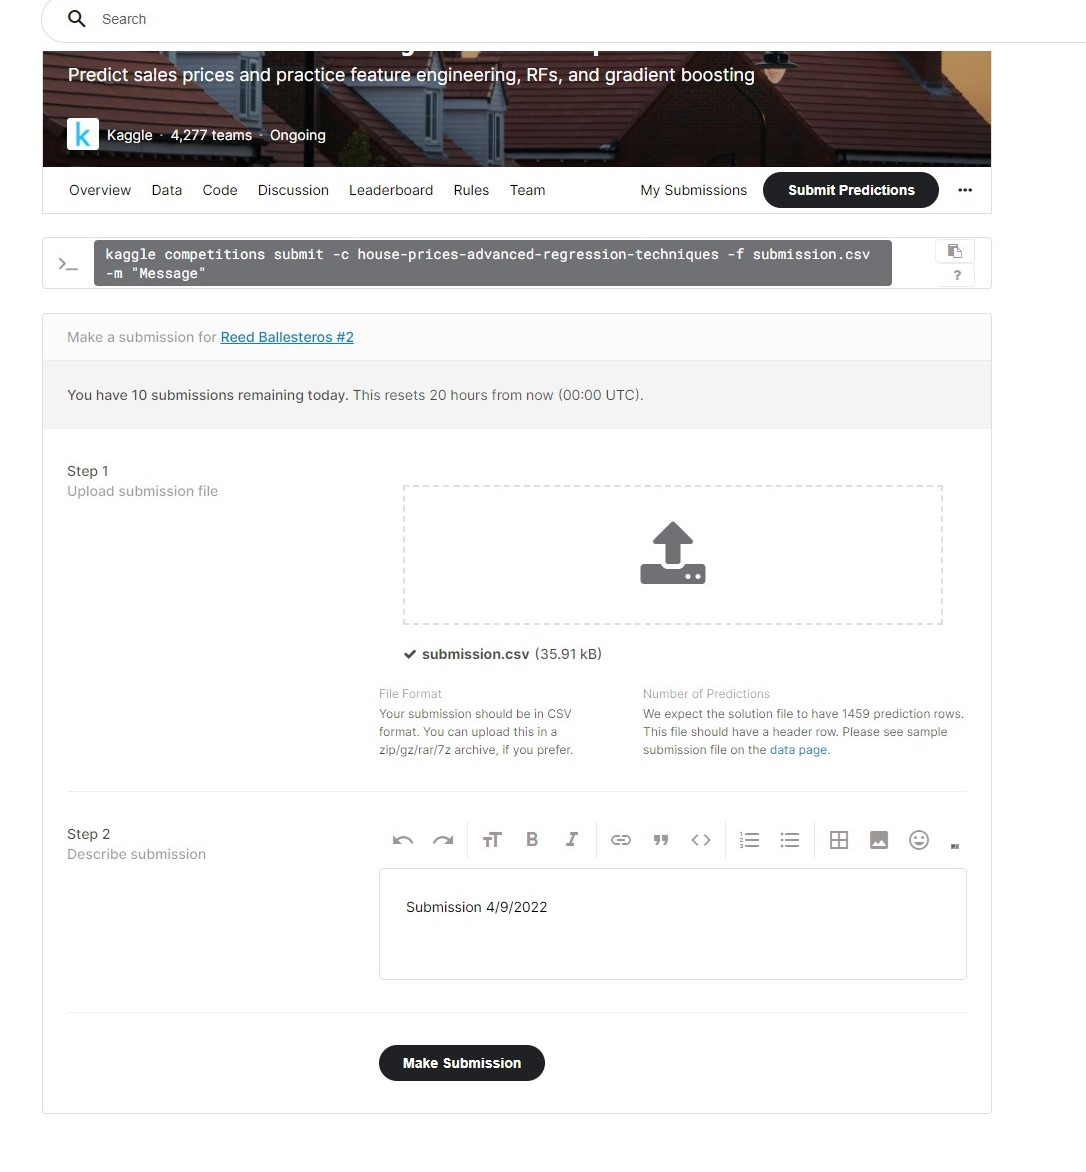

In [1085]:
from IPython.display import Image
Image(filename="image1.jpg")

- **Provide your Kaggle user name and a screen snapshot of your Kaggle scores.**

**User Name:**

https://www.kaggle.com/reedballesterosnu


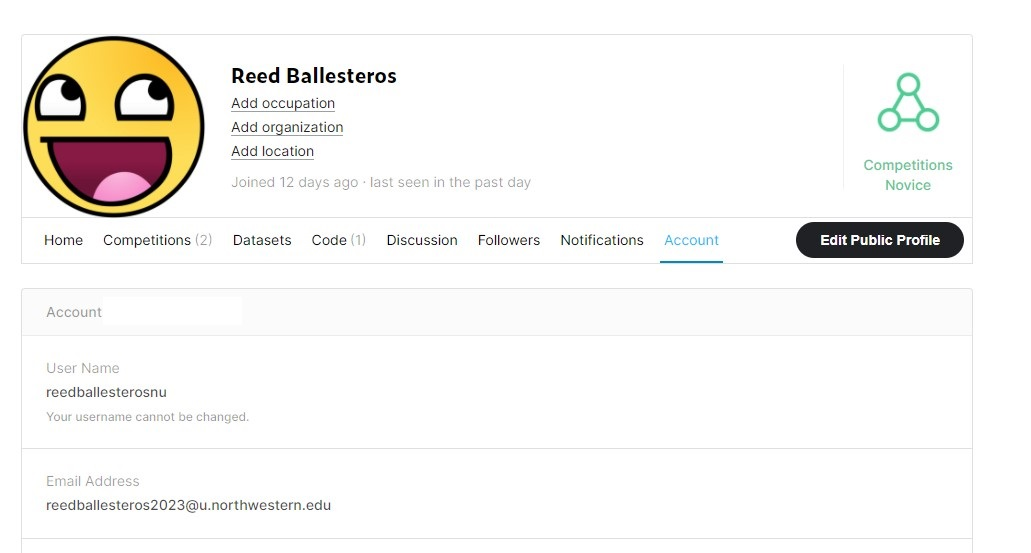

In [1086]:
Image(filename="image2.jpg")

**Kaggle Score:**

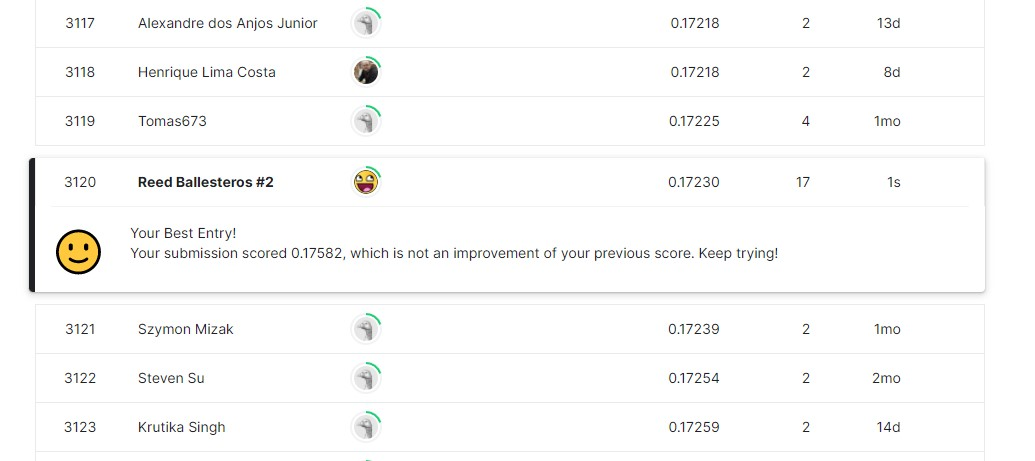

In [1087]:
Image(filename="image3.jpg")

## CONCLUSION

- **Discuss what your models tell you in layman’s terms**

**At first I attempted to use only a selction of fairly-correlated quantitative features for my model and got a relatively low score at Kaggle. It wasn't until I was able to encode a few highly-correlated categories based on my observations with box plots that my score dramatically increased. That being said, there is still much more room for improvement over time, but for generating some basic models to submit is a good start and an even better learning experience in understanding Machine Learning.**

**The Linear Regression and Ridge Regression methods yield almost the same results. Having the dataset scaled did not yield any major changes as well.**


### Management/Research Question

**In layman’s terms, what is the management/research question of interest, and why would anyone care?**


**Given the Ames, Iowa home Prices dataset, we want to find which features play a major factor in predicting the price of a home. Home owners might focus on these particular features in order to improve the value of their homes in the area. Realtors would look more at potential sales and revenue of certain homes that have a high rating of these features. Propsective buyers can use this information to understand what kind of home they can afford in the area with these kinds of features.**